Name:  BIST 100  price:  1.426,00  per:  0,59  time:  2020-12-25 01:51:43.489804
Name:  USD/TRY  price:  7,6010  per:  -0,55  time:  2020-12-25 01:51:43.489804
Name:  EUR/TRY  price:  9,2358  per:  -0,15  time:  2020-12-25 01:51:43.489804
Name:  EUR/USD  price:  1,2188  per:  0,01  time:  2020-12-25 01:51:43.489804
Name:  FAİZ  price:  14,85  per:  0,16  time:  2020-12-25 01:51:43.489804
Name:  ALTIN/ONS  price:  1.883,46  per:  0,56  time:  2020-12-25 01:51:43.489804
Name:  BRENT  price:  51,29  per:  0,18  time:  2020-12-25 01:51:43.489804
******************Anlık***************************
Name:  BIST 100  price:  1.426,00  per:  0,59  time:  2020-12-25 01:51:49.130967
Name:  USD/TRY  price:  7,6010  per:  -0,55  time:  2020-12-25 01:51:49.130967
Name:  EUR/TRY  price:  9,2358  per:  -0,15  time:  2020-12-25 01:51:49.130967
Name:  EUR/USD  price:  1,2188  per:  0,01  time:  2020-12-25 01:51:49.130967
Name:  FAİZ  price:  14,85  per:  0,16  time:  2020-12-25 01:51:49.130967
Name:  ALT

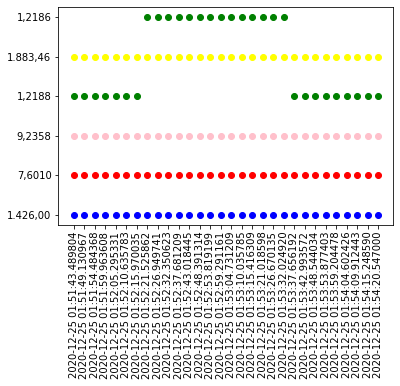

In [13]:
import requests
from bs4 import BeautifulSoup
import datetime
import time
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


a=0
degerler=[]
bilgiler={}
bilgi=[]
b=[]
price=[]
name=[]
sure=[]
per=[]

#plt.figure(figsize=(12,8))

while(a<45):
    zamani=datetime.datetime.now()
    browser=requests.get("https://www.bloomberght.com/doviz/dolar")
    kur=BeautifulSoup(browser.content,"html.parser")
    #anlikVeriler=kur.find_all("span",{"data-type":"son_fiyat"})
    anlikVeriler=kur.find_all("span",{"class":"data-info"})
    degerler= [x.text.split("\n") for x in anlikVeriler]
    for i in range(0,len(degerler),1):
        degerler[i][4]=degerler[i][4].split()
        if(degerler[i][4][0]=="%"):
            degerler[i][4]=degerler[i][4][1]
        else:
            degerler[i][4]=degerler[i][4][0]
        bilgiler.update({
            "name":degerler[i][1],
            "price":degerler[i][2],
            "per":degerler[i][4],
            "time":zamani
        })
        print("Name: ",bilgiler['name']," price: ",bilgiler['price']," per: ",bilgiler['per']," time: ",bilgiler['time'])
        name.append(bilgiler['name'])
        price.append(bilgiler['price'])
        per.append(bilgiler['per'])
        sure.append(bilgiler['time'])
      #  bilgi.append(bilgiler['per'])
      #  bilgi.append(bilgiler['time'])
    time.sleep(5)
    print("******************Anlık***************************")
    a+=1

plt.xticks(rotation=90)
for i in range(len(name)):
    if "BIST 100" in name[i]:
        plt.scatter(x=str(sure[i]), y=price[i],color="blue")
    elif "USD/TRY" in name[i]:
        plt.scatter(x=str(sure[i]), y=price[i],color="red")
    elif "EUR/TRY" in name[i]:
        plt.scatter(x=str(sure[i]), y=price[i],color="pink")
    elif "EUR/USD" in name[i]:
        plt.scatter(x=str(sure[i]), y=price[i],color="green")
    elif "ALTIN/ONS" in name[i]:
        plt.scatter(x=str(sure[i]), y=price[i],color="yellow")
    else:
        print("\n")
print("Sarı-> Altın")
print("Yeşil-> Euro/ Dolar")
print("Pembe-> Euro/ Türk Lirası")
print("Kırmızı-> Dolar/ Türk Lirası")
print("Mavi-> BİST 100")
    
